# Modeling Restaurant Price Prediction: Hands-on Model Development

This project explores the development of machine learning models for predicting restaurant pricing, focusing on the impact of feature complexity on model performance and generalization.

## Approach

- **Manually implemented** models for **classification and regression**, building them from the ground up.
- Developed a **baseline model** using simple features, then progressively introduced **additional predictors** to enhance distinction and predictive power.
- Extended the models to **clustering**, grouping restaurants based on pricing and characteristics.
- Analyzed the trade-off between **model complexity and overfitting**, demonstrating how increasing feature space influences generalization.
- Evaluated performance using **various metrics**, ensuring a balance between accuracy and interpretability.
- Emphasized the **importance of high-quality data**, showcasing how preprocessing and feature selection impact reliability.

## Key Insights

This research highlights **manual ML model development**, demonstrating how strategic feature engineering can improve classification and clustering while maintaining generalizability.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('organisations.csv')
features = pd.read_csv('features.csv')
rubrics = pd.read_csv('rubrics.csv')


In [3]:
data

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...
...,...,...,...,...,...,...
68334,4379286080707082909,msk,NaN,3.812500,30774,1018 1415 10462 11629 11867 20422 20424 118949...
68335,7916477189329738565,msk,NaN,4.894231,30776,11634 11629 3501481353 11177 3501773763 11867 ...
68336,12358902585434046825,msk,NaN,4.156250,30774,20422 11867 246 3501754799 3501779478 12048 35...
68337,1712093598996183140,spb,NaN,NaN,30771 30774,3491142672 3501481353 11867 20422 273469383 11...


In [4]:
features

,feature_id,feature_name
0,1,prepress_and_post_printing_processing
1,40,products
2,54,printing_method
3,77,fuel
4,79,shop
...,...,...
1001,3502053162,rating_of_moscow_schools_enum
1002,3502060253,michelin
1003,3502063466,card_big_button
1004,3502071401,hotel_city_center_distance_meters


In [6]:
rubrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rubric_id    15 non-null     int64 
 1   rubric_name  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [7]:
pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [16]:
import pandas as pd
from deep_translator import GoogleTranslator

rubrics_df = pd.read_csv('rubrics.csv')

translator = GoogleTranslator(source='ru', target='en')

rubrics_df['rubric_name_en'] = rubrics_df['rubric_name'].apply(translator.translate)

translated_file_path = 'rubrics_translated.csv'
rubrics_df.to_csv(translated_file_path, index=False)

print(f"Translated CSV saved to {translated_file_path}")


Translated CSV saved to rubrics_translated.csv


In [17]:
rubrics = pd.read_csv('rubrics_translated.csv')

In [ ]:
data.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...


In [18]:
rubrics_dict = dict(zip(rubrics.rubric_id, rubrics.rubric_name_en))
features_dict = dict(zip(features.feature_id, features.feature_name))

In [19]:
rubrics_dict

{30519: 'Bakery, bakery',
 30770: 'Bar, pub',
 30771: 'Fast food',
 30774: 'Cafe',
 30775: 'Pizzeria',
 30776: 'Restaurant',
 30777: 'Dining room',
 31286: 'Sportbar',
 31350: 'Confectionery',
 31375: 'Sushi-bar',
 31401: 'Hoader-bar',
 31495: 'Coffee shop',
 3108292683: 'Bar of soft drinks',
 3501514558: 'Fudkort',
 3501750896: 'Coffee with you'}

In [20]:
rubrics_dict[30777] = 'Canteen'

In [21]:
rubrics_dict[30519] = 'Bakery'

In [22]:
data = data[~data['average_bill'].isna()].copy()

In [ ]:
missing_values = data.average_bill.isnull().sum()
print(f'Number of missing values: {missing_values}')

Number of missing values: 0


In [ ]:
data.average_bill.describe()

,average_bill
count,3.277800e+04
mean,1.135075e+03
std,4.163250e+04
min,5.000000e+02
25%,5.000000e+02
50%,5.000000e+02
75%,1.000000e+03
max,7.502000e+06


In [ ]:
data.average_bill

,average_bill
0,1500.0
1,500.0
2,500.0
3,500.0
4,500.0
...,...
68328,1000.0
68329,1500.0
68330,1500.0
68331,1500.0


In [ ]:
print(data.average_bill.min(), data.average_bill.max())


500.0 7502000.0


In [23]:
moscow_data = data[data['city'] == 'msk']['average_bill']
spb_data = data[data['city'] == 'spb']['average_bill']

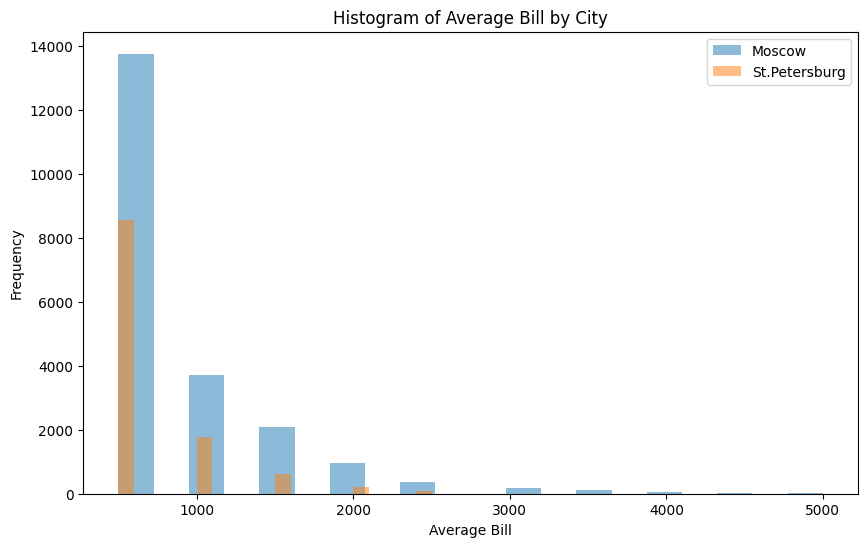

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(moscow_data, bins=20, stacked = True,range=(500, 5000),alpha=0.5, label = 'Moscow')
plt.hist(spb_data, bins=20, range=(500, 2500),alpha=0.5, label = 'St.Petersburg')
plt.xlabel('Average Bill', ha='center')
plt.ylabel('Frequency',  ha='center')
plt.title('Histogram of Average Bill by City', loc='center')
plt.legend()
plt.show()


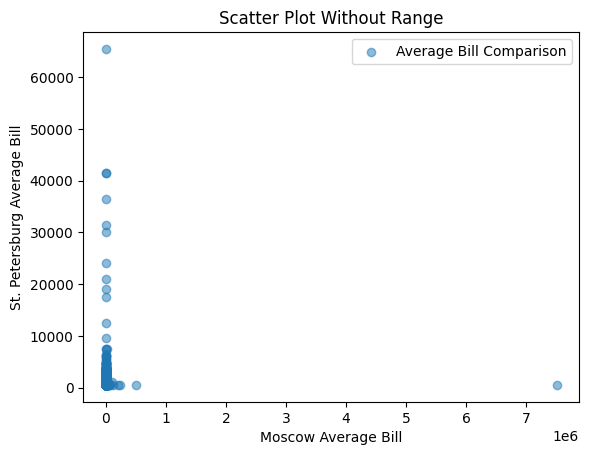

In [ ]:
import matplotlib.pyplot as plt

# Ensure the data is of equal length
min_length = min(len(moscow_data), len(spb_data))

moscow_data_sliced = moscow_data[:min_length]
spb_data_sliced = spb_data[:min_length]

plt.scatter(moscow_data_sliced, spb_data_sliced, alpha=0.5, label='Average Bill Comparison')
plt.xlabel('Moscow Average Bill')
plt.ylabel('St. Petersburg Average Bill')
plt.title('Scatter Plot Without Range')
plt.legend()



# **Analytical conclution:**

* There are quite a few gaps among the targets;
* All the targets are numbers that are multiples of 500;
* There are some extreme values exceeding 100,000 (apparently outliers);
* Overall, the number of restaurants with a given average check rapidly decreases as the average check increases. For average checks greater than 2500, there are very few establishments.
* About two-thirds of the establishments have an average check of 500



In [28]:
data = data[data['average_bill'] <= 2500].copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32136 entries, 0 to 68332
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   org_id        32136 non-null  uint64 
 1   city          32136 non-null  object 
 2   average_bill  32136 non-null  float64
 3   rating        27818 non-null  float64
 4   rubrics_id    32136 non-null  object 
 5   features_id   32136 non-null  object 
dtypes: float64(2), object(3), uint64(1)
memory usage: 1.7+ MB


In [ ]:
average_bill_diff = data.groupby('city')['average_bill'].mean()


In [ ]:
average_bill_diff

,average_bill
city,
msk,792.887230
spb,676.449662


In [ ]:
bill_diff = average_bill_diff['msk'] - average_bill_diff['spb']
bill_diff

116.43756751957676

In [ ]:
features

,feature_id,feature_name
0,1,prepress_and_post_printing_processing
1,40,products
2,54,printing_method
3,77,fuel
4,79,shop
...,...,...
1001,3502053162,rating_of_moscow_schools_enum
1002,3502060253,michelin
1003,3502063466,card_big_button
1004,3502071401,hotel_city_center_distance_meters


In [ ]:
data

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...
...,...,...,...,...,...,...
68328,17662684569129497551,spb,1000.0,4.561707,30776,246 3501779478 1018 3501618484 3501481353 3501...
68329,5700899951016592061,msk,1500.0,4.377129,31401,3501773763 10462 1018 246 3501779478 350175479...
68330,4686040819909966338,msk,1500.0,3.666667,30776,10462 1189498238 11629 1416 1415 11741 3501481...
68331,12499715465202129892,msk,1500.0,4.554577,30770 30776 30774,273469383 10462 21247 1509 1416 3501618484 350...


In [ ]:
bill_rating_corr = data['average_bill'].corr(data['rating'])

In [ ]:
bill_rating_corr

0.09026290021639105

In [ ]:
rubrics_dict

{30519: 'Bakery',
 30770: 'Bar, pub',
 30771: 'Fast food',
 30774: 'Cafe',
 30775: 'Pizzeria',
 30776: 'Restaurant',
 30777: 'Canteen',
 31286: 'Sports bar',
 31350: 'Confectionery',
 31375: 'Sushi bar',
 31401: 'Hookah bar',
 31495: 'Coffee shop',
 3108292683: 'Soft drinks bar',
 3501514558: 'Food court',
 3501750896: 'Coffee to go'}

In [29]:
data_train, data_test = train_test_split(
    data, stratify=data['average_bill'], test_size=0.33, random_state=42)

In [30]:
from scipy.stats import mode

from sklearn.base import RegressorMixin

class MeanRegressor(RegressorMixin):
    # Predicts the mean of y_train
    def fit(self, X=data_train, y=data_test):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        self.mean_value = y.mean()
        return self

    def predict(self, X=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        return [self.mean_value]*len(X)

from sklearn.base import ClassifierMixin

class MostFrequentClassifier(ClassifierMixin):
    # Predicts the rounded (just in case) median of y_train
    def fit(self, X=None, y=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        mode_values = mode(y)
        self.most_frequent_class = mode_values[0]
        return self

    def predict(self, X=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        return [self.most_frequent_class]*len(X)

In [31]:
reg = MeanRegressor()
reg.fit(y=data_train['average_bill'])

clf = MostFrequentClassifier()
clf.fit(y=data_train['average_bill'])

In [32]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import balanced_accuracy_score

predictions = reg.predict(data_test)
rsme = np.sqrt(mean_squared_error(data_test['average_bill'], predictions))

print('RSME: ',rsme)

class_predictions = clf.predict(data_test)
balanced_accuracy_score = balanced_accuracy_score(data_test['average_bill'], class_predictions)

print('class_predictions: ', class_predictions)

RSME:  448.7143889551622
class_predictions:  [500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 50

In [33]:
from sklearn.base import RegressorMixin

class CityMeanRegressor(RegressorMixin):
    def fit(self, X=None, y=None):
        if X is None or y is None:
          raise ValueError("X or y must be not None")

        self.city_mean = X.groupby('city')['average_bill'].mean().to_dict()
        return self


    def predict(self, X=None):
        if X is None:
          raise ValueError("X must be not None")
        return X['city'].map(self.city_mean).fillna(self.city_mean)

In [34]:
city_mean_regressor = CityMeanRegressor()
city_mean_regressor.fit(data_train, data_train['average_bill'])

In [35]:
predictions_city_mean = city_mean_regressor.predict(data_test)
rsme_city_mean = np.sqrt(mean_squared_error(data_test['average_bill'], predictions_city_mean))

print('RSME: ',rsme_city_mean)


RSME:  445.1063281403263


In [36]:
from collections import Counter


rubric_counts = Counter(data_train['rubrics_id'])

threshold = 100
popular_rubrics = {rubric for rubric, count in rubric_counts.items() if count >= threshold}

def modify_rubrics(rubrics):
    return rubrics if rubrics in popular_rubrics else 'other'

data_train['modified_rubrics'] = data_train['rubrics_id'].apply(modify_rubrics)
data_test['modified_rubrics'] = data_test['rubrics_id'].apply(modify_rubrics)

print(data_train)
print(data_test)


                     org_id city  average_bill    rating   rubrics_id  \
45769   3276960721840719260  msk         500.0  4.500000        30770   
39061   8452997364765928283  msk        1500.0  4.442623  30774 30776   
59281  14240408259222214074  spb        1000.0  4.018868  30776 30774   
51225  15114069072602161053  msk        1500.0  4.364742  31401 30776   
29587   2730337118800634815  msk        1000.0  4.698718        30770   
...                     ...  ...           ...       ...          ...   
64667  15641319025413596274  msk         500.0  4.510753        30771   
47309   2049892259403324519  msk         500.0  4.333333        30771   
26208  12224074314753892871  msk         500.0  5.000000        30775   
48599  16581456988770474074  msk         500.0  4.692308  31495 30774   
17863  11409605273003015299  msk         500.0  3.222222        30774   

                                             features_id modified_rubrics  
45769            11704 20422 1018 11177 1416 11

In [40]:
from sklearn.metrics import mean_squared_error

class RubricsMeanRegressor(RegressorMixin):
    def fit(self, X=None, y=None):
        if X is None or y is None:
            raise ValueError("X or y must not be None")

        self.global_median = np.median(y)  # Default fallback value
        self.rubrics_median = X.assign(average_bill=y).groupby(['city', 'modified_rubrics'])['average_bill'].median().to_dict()

        return self

    def predict(self, X=None):
        if X is None:
            raise ValueError("X must not be None")

        def get_median(row):
            return self.rubrics_median.get((row['city'], row['modified_rubrics']), self.global_median)

        return X.apply(get_median, axis=1)




In [41]:
rubrics_regressor = RubricsMeanRegressor()
rubrics_regressor.fit(data_train, data_train['average_bill'])

In [42]:
predictions_rubrics = rubrics_regressor.predict(data_test)


predictions_rubrics = np.array(predictions_rubrics, dtype=float)


rmse_rubrics = np.sqrt(mean_squared_error(data_test["average_bill"], predictions_rubrics))

print('RMSE: ', rmse_rubrics)

RMSE:  393.96675836287915


## Comparing Prediction Accuracy

In [45]:
from sklearn.metrics import accuracy_score

frequent_bill = data_train['average_bill'].mode()[0]
predictions_frequent_bill = [frequent_bill]*len(data_test)
accuracy_baseline = accuracy_score(data_test['average_bill'],predictions_frequent_bill)

print('Baseline Accuracy: ', accuracy_baseline )

Baseline Accuracy:  0.6947666195190948


In [47]:
accuracy_rubrics_regression = accuracy_score(data_test['average_bill'], predictions_rubrics)

print('Accuracy of Rubrics Regression: ', accuracy_rubrics_regression)

Accuracy of Rubrics Regression:  0.7095709570957096


Class-wise accuracy Diagnostic

In [55]:
actual = data_test['average_bill']
predicted = predictions_rubrics

df_results = pd.DataFrame({
    'Actual': actual,
    'Predicted': predicted
})

diagnostics = df_results.groupby('Actual').agg(
    total_objects = ('Actual', 'count'),
    correct_predictions=("Predicted", lambda x: np.sum(x == x.iloc[0]))
)

diagnostics['accuracy_per_class'] = diagnostics['correct_predictions'] / diagnostics['total_objects']

diagnostics

,total_objects,correct_predictions,accuracy_per_class
Actual,,,
500.0,7368,6608,0.896851
1000.0,1809,864,0.477612
1500.0,890,400,0.449438
2000.0,391,145,0.370844
2500.0,147,71,0.482993


In [59]:
data_train

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics
45769,3276960721840719260,msk,500.0,4.500000,30770,11704 20422 1018 11177 1416 11867 10462,30770
39061,8452997364765928283,msk,1500.0,4.442623,30774 30776,1415 3501481355 1416 11629 10462 1524 20422 11...,30774 30776
59281,14240408259222214074,spb,1000.0,4.018868,30776 30774,3502045032 11741 3502045016 10462 11704 350177...,30776 30774
51225,15114069072602161053,msk,1500.0,4.364742,31401 30776,3501513153 3501779478 3491142672 273469383 350...,other
29587,2730337118800634815,msk,1000.0,4.698718,30770,21247 10896 3491142672 11629 3501481353 350148...,30770
...,...,...,...,...,...,...,...
64667,15641319025413596274,msk,500.0,4.510753,30771,20424 3501744275 273469383 10462 11177 11617 1...,30771
47309,2049892259403324519,msk,500.0,4.333333,30771,273469383 20424 11704 11629 10462 20422 1018,30771
26208,12224074314753892871,msk,500.0,5.000000,30775,21247 11867 11629 1524 1509 20422 1416 1415 10...,30775
48599,16581456988770474074,msk,500.0,4.692308,31495 30774,3491142672 20282 3501637468 11741 3501745827 3...,31495 30774


In [72]:
data_train['modified_features'] = data_train.apply(
    lambda row: row['rubrics_id'] + 'q ' + ''.join(row['features_id']), axis=1
)

data_test['modified_features'] = data_test.apply(
    lambda row: row['rubrics_id'] + 'q ' + ''.join(row['features_id']), axis=1
)

train_unique_features = set(data_train['modified_features'])
data_test['modified_features'] = data_test['modified_features'].apply(
    lambda x: x if x in train_unique_features else 'other'
)

In [74]:
data_test

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics,modified_features
65841,14385912302763770021,spb,1000.0,4.748444,30776 30770 31401,11177 3501618484 10462 3501481355 1509 1416 20...,other,other
48882,16695436192794975203,msk,500.0,3.793758,30771,3501744275 273469383 3501513153 11617 10462 11...,30771,other
33711,11841431940065207518,msk,500.0,3.606557,30771 30777,3501773763 3501744275 3501773764 3501618484 15...,other,other
33544,16028521499441205186,msk,2000.0,4.683841,30776,3501618484 20422 1082283206 11704 11629 21247 ...,30776,other
35293,12477116204055673498,spb,500.0,4.165394,30776 31401 30770,1524 246 11704 1018 3501618484 2020795524 2124...,other,other
...,...,...,...,...,...,...,...,...
55337,9041226080397910513,msk,2500.0,4.408108,30776,11629 11704 10462 11617 3501744275 20424 35017...,30776,other
64048,14998683880343589209,msk,1000.0,3.555556,30776,273469383 20424 20422 246 1416 11867 11629 104...,30776,other
22010,1621254442333414922,msk,2000.0,4.402516,30776,273469383 21247 11867 1082283206 20422 246 101...,30776,other
40089,5620614742257813954,msk,500.0,NaN,30771,11704 1018 273469383 10462 20422,30771,30771q 11704 1018 273469383 10462 20422


In [75]:
from sklearn.metrics import mean_squared_error

class FeaturesMeanRegressor(RegressorMixin):
    def fit(self, X=None, y=None):
        if X is None or y is None:
            raise ValueError("X or y must not be None")

        self.global_median = np.median(y)  # Default fallback value
        self.features_median = X.assign(average_bill=y).groupby(['city', 'modified_features'])['average_bill'].median().to_dict()

        return self

    def predict(self, X=None):
        if X is None:
            raise ValueError("X must not be None")

        def get_median(row):
            return self.features_median.get((row['city'], row['modified_features']), self.global_median)

        return X.apply(get_median, axis=1)




In [76]:
features_regressor = FeaturesMeanRegressor()
features_regressor.fit(data_train, data_train['average_bill'])

In [77]:
predictions_features = features_regressor.predict(data_test)


predictions_features = np.array(predictions_features, dtype=float)


rmse_features = np.sqrt(mean_squared_error(data_test["average_bill"], predictions_features))

print('RMSE: ', rmse_features)

RMSE:  514.4768883505504


In [78]:
accuracy_features_regression = accuracy_score(data_test['average_bill'], predictions_features)

print('Accuracy of Features Regression: ', accuracy_features_regression)

Accuracy of Features Regression:  0.6946723243752947


In [79]:
actual = data_test['average_bill']
predicted = predictions_features

df_results = pd.DataFrame({
    'Actual': actual,
    'Predicted': predicted
})

diagnostics_features = df_results.groupby('Actual').agg(
    total_objects = ('Actual', 'count'),
    correct_predictions=("Predicted", lambda x: np.sum(x == x.iloc[0]))
)

diagnostics_features['accuracy_per_class'] = diagnostics['correct_predictions'] / diagnostics_features['total_objects']

diagnostics

,total_objects,correct_predictions,accuracy_per_class
Actual,,,
500.0,7368,6608,0.896851
1000.0,1809,864,0.477612
1500.0,890,400,0.449438
2000.0,391,145,0.370844
2500.0,147,71,0.482993


In [80]:
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import OneHotEncoder


data_train["city"] = (data_train["city"] == "msk").astype(int)
data_test["city"] = (data_test["city"] == "msk").astype(int)

# One-Hot Encoding for rubrics_id and features_id
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform rubrics_id and features_id into one-hot vectors
rubrics_train = ohe.fit_transform(data_train[['rubrics_id']])
rubrics_test = ohe.transform(data_test[['rubrics_id']])

features_train = ohe.fit_transform(data_train[['features_id']])
features_test = ohe.transform(data_test[['features_id']])

# Counting unknown features in test set
known_features = set(data_train["features_id"].explode().unique())
test_feature_counts = data_test["features_id"].apply(lambda x: sum(f not in known_features for f in x))

# Converting additional features to sparse matrices
city_train = csr_matrix(data_train["city"].values.reshape(-1, 1))
city_test = csr_matrix(data_test["city"].values.reshape(-1, 1))

rating_train = csr_matrix(data_train["rating"].values.reshape(-1, 1))
rating_test = csr_matrix(data_test["rating"].values.reshape(-1, 1))

feature_other_train = csr_matrix(np.zeros((data_train.shape[0], 1)))  # No unknown features in train
feature_other_test = csr_matrix(test_feature_counts.values.reshape(-1, 1))

# Combine all features into a single sparse matrix
sparse_data_train = hstack([city_train, rating_train, rubrics_train, features_train, feature_other_train]).tocsr()
sparse_data_test = hstack([city_test, rating_test, rubrics_test, features_test, feature_other_test]).tocsr()



In [82]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


Данные готовы, и теперь можно запустить катбуст

In [83]:
from catboost import CatBoostClassifier

In [86]:
clf = CatBoostClassifier()
clf.fit(sparse_data_train, data_train['average_bill'])

Learning rate set to 0.092536
0:	learn: 1.4507103	total: 967ms	remaining: 16m 5s
1:	learn: 1.3324773	total: 1.52s	remaining: 12m 40s
2:	learn: 1.2474361	total: 1.86s	remaining: 10m 19s
3:	learn: 1.1837735	total: 2.26s	remaining: 9m 23s
4:	learn: 1.1314582	total: 2.81s	remaining: 9m 19s
5:	learn: 1.0872349	total: 3.15s	remaining: 8m 41s
6:	learn: 1.0508566	total: 3.44s	remaining: 8m 8s
7:	learn: 1.0192132	total: 3.83s	remaining: 7m 54s
8:	learn: 0.9909948	total: 4.17s	remaining: 7m 39s
9:	learn: 0.9673971	total: 4.52s	remaining: 7m 27s
10:	learn: 0.9493326	total: 4.85s	remaining: 7m 16s
11:	learn: 0.9309959	total: 5.26s	remaining: 7m 13s
12:	learn: 0.9137273	total: 5.66s	remaining: 7m 9s
13:	learn: 0.8999453	total: 5.97s	remaining: 7m
14:	learn: 0.8874896	total: 6.31s	remaining: 6m 54s
15:	learn: 0.8761632	total: 6.67s	remaining: 6m 50s
16:	learn: 0.8658457	total: 6.98s	remaining: 6m 43s
17:	learn: 0.8571425	total: 7.37s	remaining: 6m 42s
18:	learn: 0.8480698	total: 7.8s	remaining: 6m 4

In [92]:
from sklearn.metrics import balanced_accuracy_score

y_pred = clf.predict(sparse_data_test)

cat_accuracy = balanced_accuracy_score(data_test['average_bill'], y_pred)

print('CatBoost Accuracy: ', cat_accuracy)

CatBoost Accuracy:  0.26261265124154953


## Conclusion

The most important factor in modeling is not the complexity of the model but the quality of the data. A more sophisticated or advanced model does not necessarily guarantee superior results. Instead, focusing on data preprocessing, feature engineering, and ensuring high-quality inputs often has a more significant impact on performance than simply choosing the most complex algorithm.
